In [25]:
from pathlib import Path

from PySAGA_cmd import SAGA
import matplotlib.pyplot as plt

# Creating a Tool object

In [18]:
# Defining saga_cmd location
saga_cmd = '/usr/bin/saga_cmd'

# Instantiating a SAGA environment
saga = SAGA(saga_cmd)

# Choosing a library
ta_morphometry = saga / 'ta_morphometry'

# Choosing a tool
slope_aspect = ta_morphometry / 'Slope, Aspect, Curvature'

# Use this line of code to see which parameters you have to set
print(slope_aspect.run_command().text)

____________________________

   #####   ##   #####    ##
  ###     ###  ##       ###
   ###   # ## ##  #### # ##
    ### ##### ##    # #####
 ##### #   ##  ##### #   ##
____________________________

SAGA Version: 7.3.0

____________________________
library path: /usr/lib/x86_64-linux-gnu/saga/
library name: libta_morphometry
library     : ta_morphometry
tool        : Slope, Aspect, Curvature
identifier  : 0
author      : O.Conrad (c) 2001
processors  : 4 [4]
____________________________


Usage: saga_cmd ta_morphometry 0 [-ELEVATION <str>] [-SLOPE <str>] [-ASPECT <str>] [-C_GENE <str>] [-C_PROF <str>] [-C_PLAN <str>] [-C_TANG <str>] [-C_LONG <str>] [-C_CROS <str>] [-C_MINI <str>] [-C_MAXI <str>] [-C_TOTA <str>] [-C_ROTO <str>] [-METHOD <str>] [-UNIT_SLOPE <str>] [-UNIT_ASPECT <str>]
  -ELEVATION:<str>  	Elevation
	Grid (input)
  -SLOPE:<str>      	Slope
	Grid (output)
  -ASPECT:<str>     	Aspect
	Grid (output)
  -C_GENE:<str>     	General Curvature
	Grid (optional output)
  -C_PROF:<s

# Running the tool

In [19]:
dem_dir = Path('data/example_input/DEM_30m.tif')

output_dir = Path('data/example_output/')
slope_dir = output_dir / 'SLOPE_30m.sdat'
aspect_dir = output_dir / 'ASPECT_30m.sdat'
c_gene_dir = output_dir / 'C_GENE_30m.sdat'
c_prof_dir = output_dir / 'C_PROF_30m.sdat'
c_plan_dir = output_dir / 'C_PLAN_30m.sdat'
c_tang_dir = output_dir / 'C_TANG_30m.sdat'
c_long_dir = output_dir / 'C_LONG_30m.sdat'
c_cros_dir = output_dir / 'C_CROS_30m.sdat'
c_mini_dir = output_dir / 'C_MINI_30m.sdat'
c_maxi_dir = output_dir / 'C_MAXI_30m.sdat'
c_tota_dir = output_dir / 'C_TOTA_30m.sdat'
c_roto_dir = output_dir / 'C_ROTO_30m.sdat'

# Simply pass the arguments to the 'run_command' method
output = slope_aspect.run_command(
    elevation=dem_dir,
    slope=slope_dir,
    aspect=aspect_dir,
    c_gene=c_gene_dir,
    c_prof=c_prof_dir,
    c_plan=c_plan_dir,
    c_tang=c_tang_dir,
    c_long=c_long_dir,
    c_cros=c_cros_dir,
    c_mini=c_mini_dir,
    c_maxi=c_maxi_dir,
    c_tota=c_tota_dir,
    c_roto=c_roto_dir,
    method='6',
    unit_slope='1',
    unit_aspect='1'
)

In [20]:
# The 'output' variable is now an output object. To print out the text result just print the text attribute
print(output.text[:650]) # output is truncated

____________________________

   #####   ##   #####    ##
  ###     ###  ##       ###
   ###   # ## ##  #### # ##
    ### ##### ##    # #####
 ##### #   ##  ##### #   ##
____________________________

SAGA Version: 7.3.0

____________________________
library path: /usr/lib/x86_64-linux-gnu/saga/
library name: libta_morphometry
library     : ta_morphometry
tool        : Slope, Aspect, Curvature
identifier  : 0
author      : O.Conrad (c) 2001
processors  : 4 [4]
____________________________

loading: DEM_30m


  1%
  2%
  3%
  4%
  5%
  6%
  7%
  8%
  9%
 10%
 11%
 12%
 13%
 14%
 15%
 16%
 17%
 18%
 19%
 20%
 21%
 22%
 23%
 24%
 25%
 26%
 27%
 2


# Plotting some of the output rasters

In [21]:
rasters = output.get_raster(['elevation', 'slope', 'c_prof'])
rasters

[Raster(path='data/example_input/DEM_30m.tif'),
 Raster(path='data/example_output/SLOPE_30m.sdat'),
 Raster(path='data/example_output/C_PROF_30m.sdat')]

<GeoAxes: >

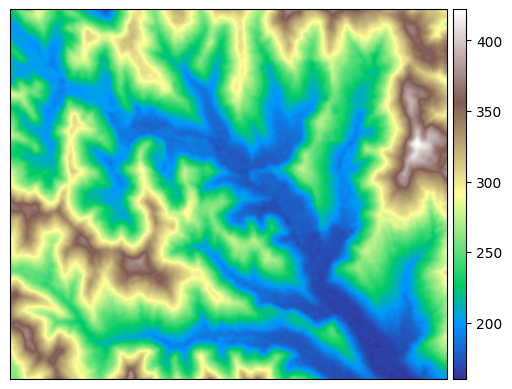

In [22]:
rasters[0].plot(cmap='terrain')

<GeoAxes: >

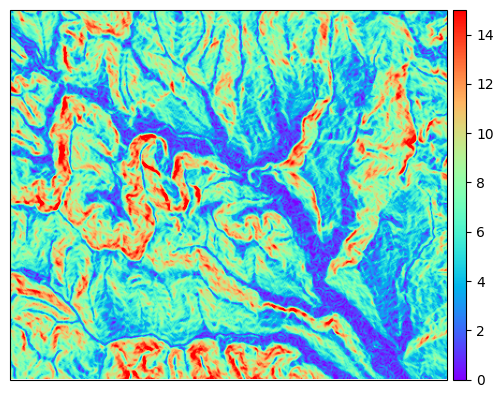

In [23]:
rasters[1].plot(cmap='rainbow', vmin=0, vmax=15)

<Axes: >

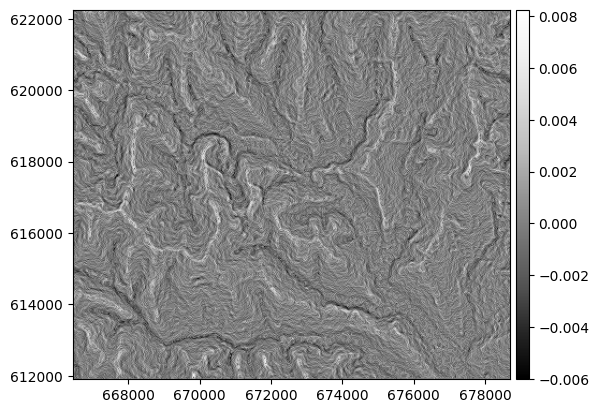

In [24]:
fig, ax = plt.subplots()
rasters[2].plot(norm='linear', ax=ax)